In [1]:
import os
import torch
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms, utils, datasets
plt.ion()

In [2]:
# mean and standart deviation of all dataset
mean = [0.0804, 0.0667, 0.0513]
std = [0.1367, 0.1182, 0.0818]
mean_size = 280

In [3]:
def show_image(img, mean=mean, std=std):
    image = img * std + mean
    image = np.clip(image, 0, 1)
    plt.tight_layout()
    io.imshow(image)
    

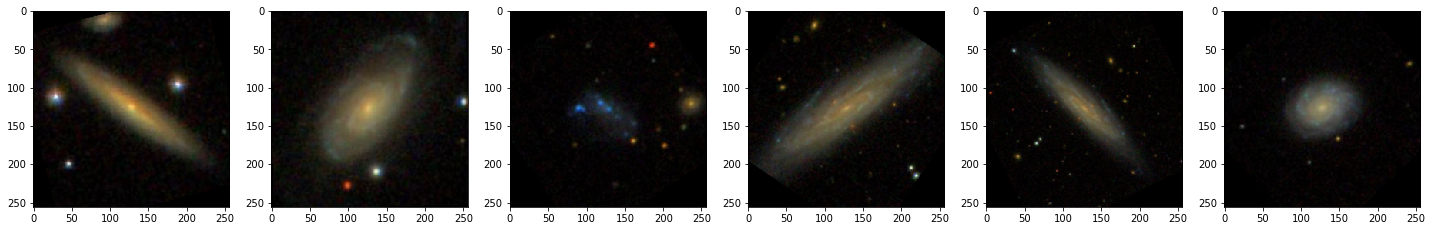

In [4]:
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(180),
        transforms.RandomVerticalFlip(),
        transforms.Resize(256),        
        transforms.ToTensor(),
        transforms.Normalize(mean=mean,
                             std=std)
    ])

galaxy_dataset = datasets.ImageFolder(root='data/',
                              transform=data_transform)

fig = plt.figure(figsize=(20, 16))

for i in range(len(galaxy_dataset)):
    image, _ = galaxy_dataset[i]
    image = np.swapaxes(image.numpy(), 0, 2)
    plt.subplot(1, 6, i + 1)
    show_image(image)
    
    if i == 5:
        plt.show()
        break

In [6]:
data_loader = DataLoader(dataset=galaxy_dataset, batch_size=32,
                         shuffle=True
                        )

In [7]:
from Autoencoder import Encoder, Decoder, Autoencoder
model = Autoencoder(64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [12]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        # get the inputs
        inputs, _ = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
#         if i % 1 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
        running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.985
[1,     2] loss: 0.875
[1,     3] loss: 0.728
[1,     4] loss: 1.049
[1,     5] loss: 0.703
[1,     6] loss: 0.959
[1,     7] loss: 0.928
[1,     8] loss: 0.923
[1,     9] loss: 0.787
[1,    10] loss: 0.823
[1,    11] loss: 0.724
[1,    12] loss: 0.811
[1,    13] loss: 0.973
[1,    14] loss: 0.807
[1,    15] loss: 0.665
[1,    16] loss: 0.615
[1,    17] loss: 0.842
[1,    18] loss: 0.625
[1,    19] loss: 0.396
[1,    20] loss: 0.575
[1,    21] loss: 0.392
[1,    22] loss: 0.417
[1,    23] loss: 0.485
[1,    24] loss: 0.815
[1,    25] loss: 0.517
[1,    26] loss: 0.437
[1,    27] loss: 0.441
[1,    28] loss: 0.370
[1,    29] loss: 0.443
[1,    30] loss: 0.368
[1,    31] loss: 0.339
[1,    32] loss: 0.359
[1,    33] loss: 0.329
[1,    34] loss: 0.288
[1,    35] loss: 0.326
[1,    36] loss: 0.329
[1,    37] loss: 0.257
[1,    38] loss: 0.425
[1,    39] loss: 0.257
[1,    40] loss: 0.322
[1,    41] loss: 0.277
[1,    42] loss: 0.230
[1,    43] loss: 0.401
[1,    44] 

KeyboardInterrupt: 

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 8000 + 1) instead
  """Entry point for launching an IPython kernel.


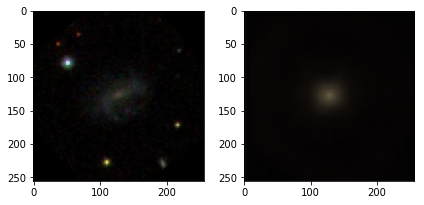

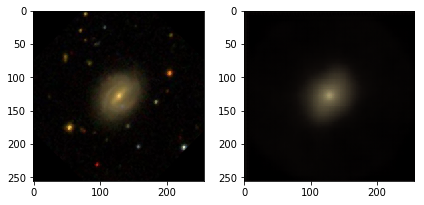

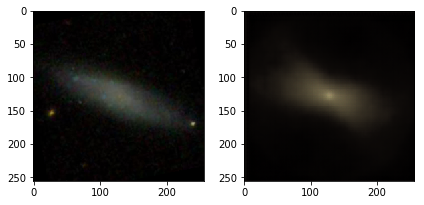

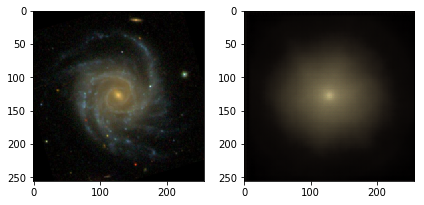

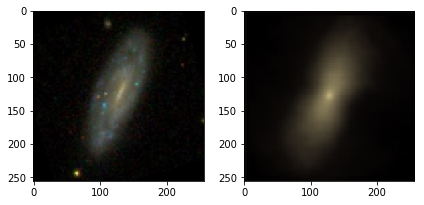

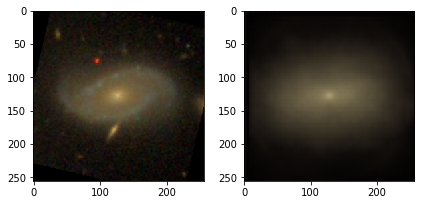

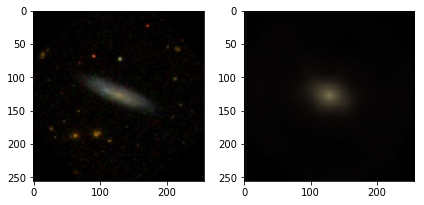

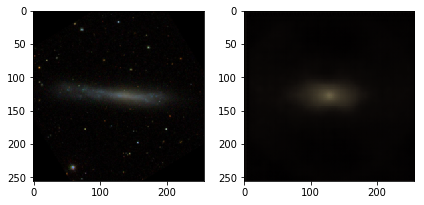

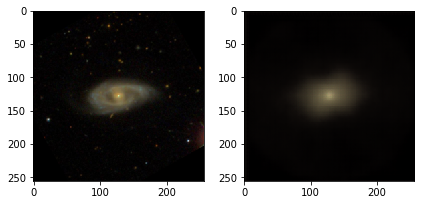

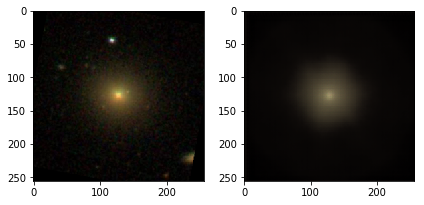

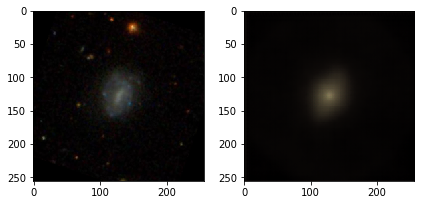

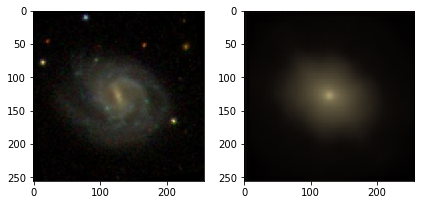

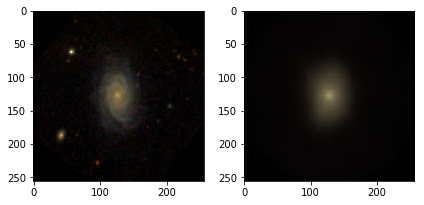

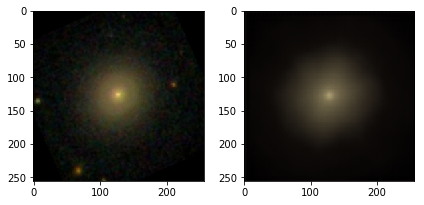

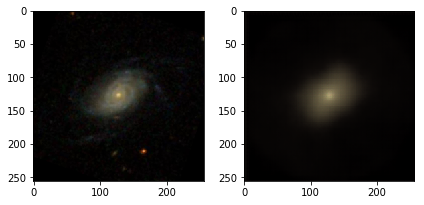

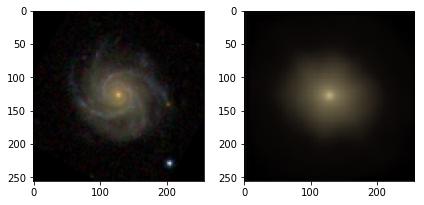

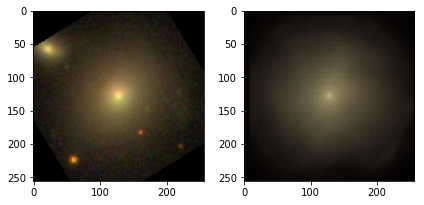

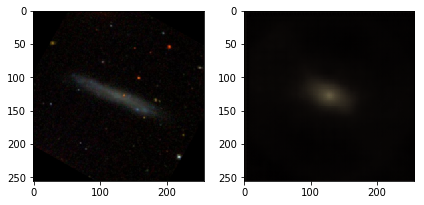

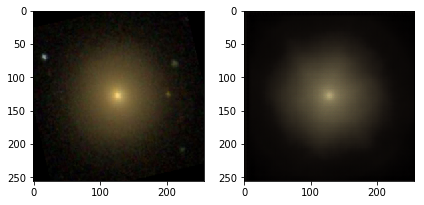

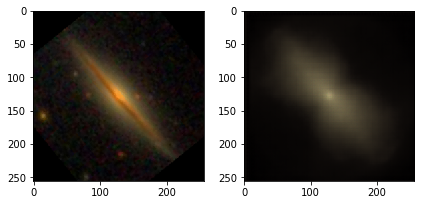

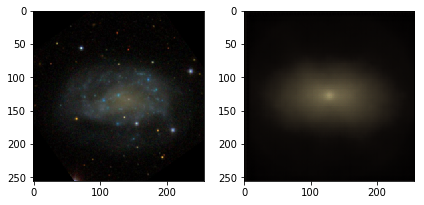

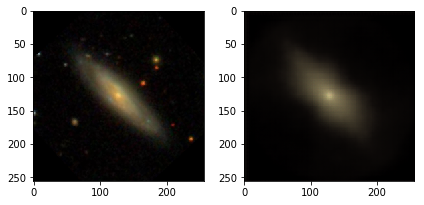

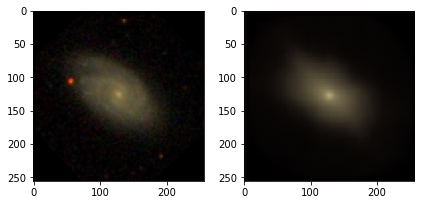

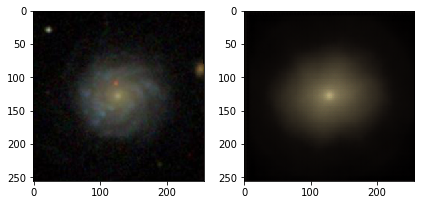

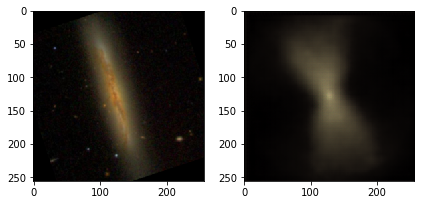

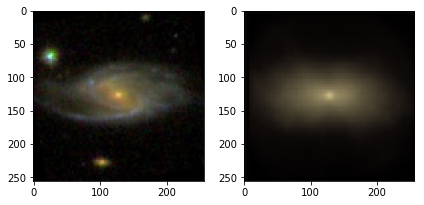

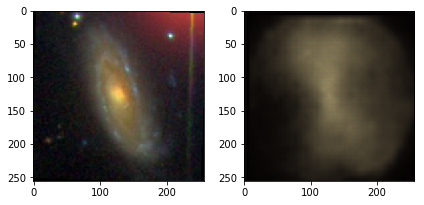

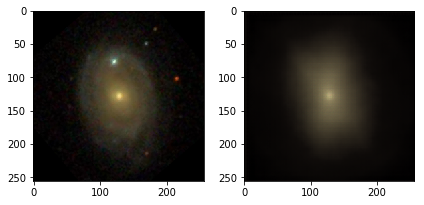

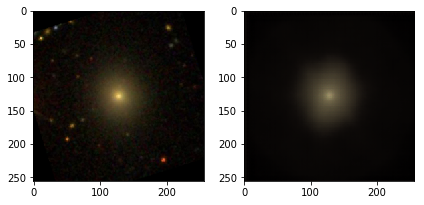

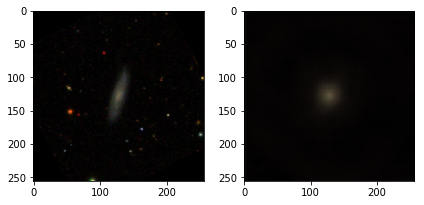

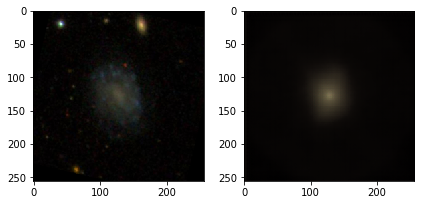

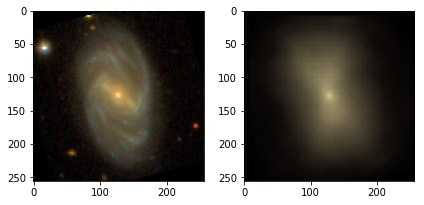

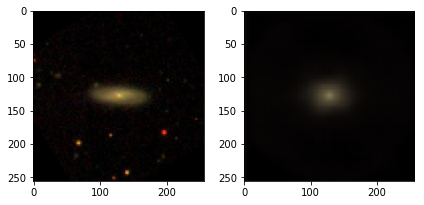

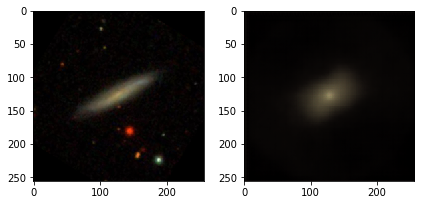

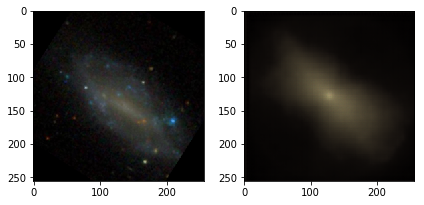

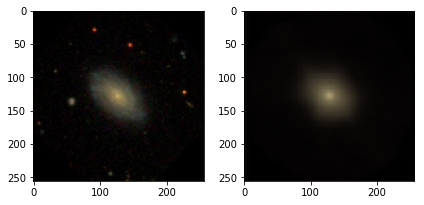

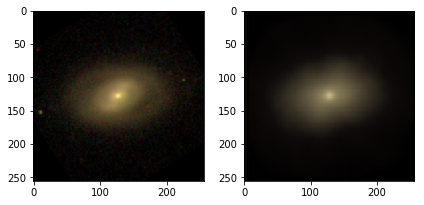

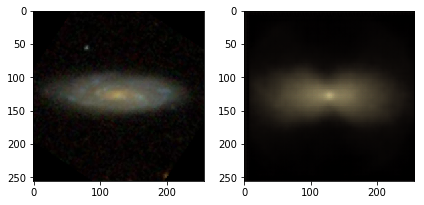

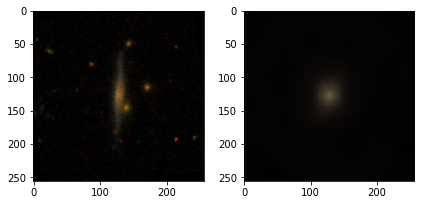

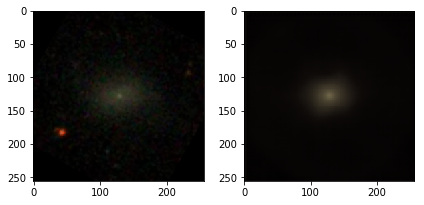

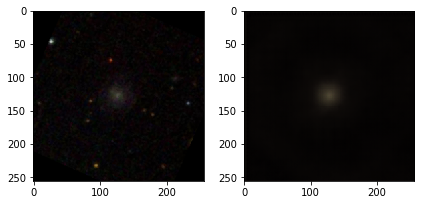

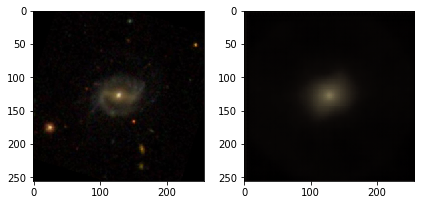

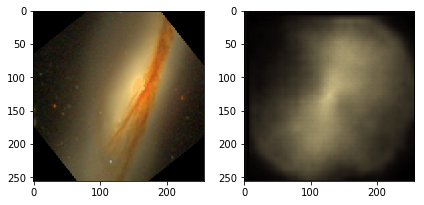

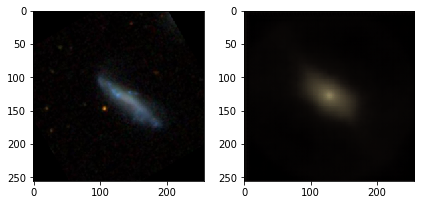

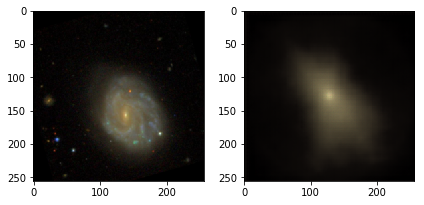

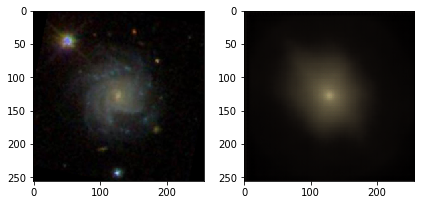

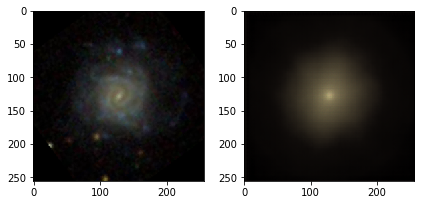

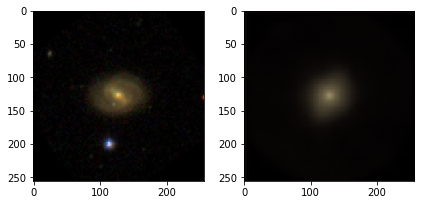

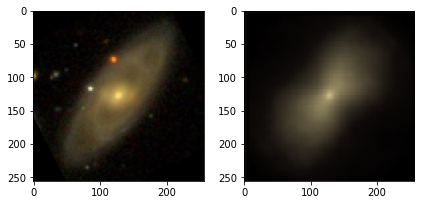

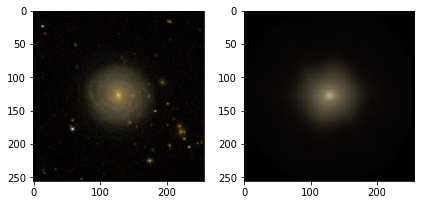

In [36]:
for i in np.random.random_integers(0, 8000, 50):
    image, _ = galaxy_dataset[i]
    plt.subplot(1, 2, 1)
    show_image(np.swapaxes(image.numpy(), 0, 2))
    predict_image = model(image[None])[0].detach()
    plt.subplot(1, 2, 2)
    show_image(np.swapaxes(predict_image.numpy(), 0, 2))
    plt.show()